In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import plot_importance
# import branca
# import folium
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [127]:
listings = pd.read_csv("listings.csv")
# calendar = pd.read_csv("calendar.csv")

In [128]:
# calendar=calendar.rename(columns={'listing_id' : 'id'})
# calendar.head()

In [129]:
# listings = pd.merge(listings,calendar, on = 'id')

EN fusionnant les deux fichiers, mon pc plantait après l'execution de quelques commandes basiques. J'ai donc décidé de travailler qu'avec le fichier listings 

#  FORMATAGE DES DONNEES

In [130]:
print(listings.shape)
listings.head()

(65917, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201214191425,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,...,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,364,2020-12-16,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20201214191425,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,...,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,2,2,2,2,2020-12-17,9,0,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4890,https://www.airbnb.com/rooms/4890,20201214191425,2020-12-16,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,2009-01-16,"Paris, Île-de-France, France",I am the owner of Cobblestone Paris Rentals\r\...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6792/profile_...,https://a0.muscache.com/im/users/6792/profile_...,Le Marais,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Paris, Ile-de-France, France",Temple,NaN,48.86409,2.35651,Entire apartment,Entire home/apt,4,...,5,120,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,8,37,67,67,2020-12-16,23,1,0,2011-11-22,2020-09-07,95.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,14,14,0,0,0.21
3,5396,https://www.airbnb.com/rooms/5396,20201214191425,2020-12-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both j

In [131]:
pd.set_option('display.max_columns', len(listings.columns)) 
pd.set_option('display.max_rows', 100)
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201214191425,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Dryer"", ""Host greets you"", ""Hot water"", ""Han...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,364,2020-12-16,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20201214191425,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Children\u2019s books and toys"", ""Paid parki...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,2,2,2,2,2020-12-17,9,0,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19


### Format des données

On remarque que plusieurs paramètres sont de types string alors que nous avons besoin de type float. 

Nous allons donc utiliser la fonction astype. Mais avant cela, il faudrait retirer les symboles spéciaux.

In [132]:
listings[["price","host_response_rate","host_acceptance_rate"]].head()

,price,host_response_rate,host_acceptance_rate
0,$125.00,NaN,67%
1,$60.00,NaN,0%
2,$69.00,100%,100%
3,$62.00,100%,100%
4,$53.00,100%,87%


In [133]:
listings[["price","host_response_rate","host_acceptance_rate"]].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [134]:
listings["price"] = listings["price"].str[1:].str.replace(",","").astype("float")
listings["host_response_rate"] = listings["host_response_rate"].str[:-1].astype("float") / 100
listings["host_acceptance_rate"] = listings["host_acceptance_rate"].str[:-1].astype("float") / 100

In [135]:
listings[["price","host_response_rate","host_acceptance_rate"]].head()

,price,host_response_rate,host_acceptance_rate
0,125.0,NaN,0.67
1,60.0,NaN,0.00
2,69.0,1.0,1.00
3,62.0,1.0,1.00
4,53.0,1.0,0.87


### Formatage de la feature bathroom

En explorant le jeu de données, on remarque aussi que l'informations de salle de bain est mal formatée. 

En effet le nombre et le type de la salle de bain sont tous les deux dans la même colonne comme vous pouvez le voir ci-dessous.

Je vais donc spliter l'information en deux colonnes.

In [136]:
listings[["bathrooms_text"]].head()

,bathrooms_text
0,2 baths
1,1 bath
2,1 bath
3,1 bath
4,1 bath


In [137]:
listings["bathroom_qty"] = listings["bathrooms_text"].str.split(" ", expand=True)[0]
listings["bathroom_type"] = listings["bathrooms_text"].str.split(" ", expand=True)[1]
listings[["bathroom_qty","bathroom_type"]].head()

,bathroom_qty,bathroom_type
0,2,baths
1,1,bath
2,1,bath
3,1,bath
4,1,bath


In [138]:
listings.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               64
description                                      1443
neighborhood_overview                           26266
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                          28
host_since                                         28
host_location                                     174
host_about                                      32245
host_response_time                              42291
host_response_rate                              42291
host_acceptance_rate                            29704
host_is_superhost                                  28
host_thumbnail_url          

### Colonnes inutiles à l'analyse
Il existe plusieurs colonnes pour les nuitées minimales et maximales, mais il y apeu de différence entre chacune, par exemple, minimum_nights et minimum_minimum_nights. Ce dernier fait vraisemblablement référence au fait que les nuitées minimales et maximales peuvent varier au cours de l'année.

Aussi, nous avons pas besoin de plusieurs colonnes qui sont soit entièrement vides où dont l'information n'est pas pertinente pour notre analyse.


In [139]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','first_review','last_review','license','calendar_updated','neighbourhood_group_cleansed','neighbourhood' ,'neighborhood_overview','host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','has_availability', 'host_has_profile_pic','minimum_minimum_nights','bathrooms','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','bathroom_type']
df = listings.drop(cols_to_drop, axis=1)
df.shape

(65917, 38)

In [140]:
df.replace({'f': 0, 't': 1}, inplace=True)

## Fournitures

In [141]:
df.amenities[:1].values

array(['["Dryer", "Host greets you", "Hot water", "Hangers", "Iron", "Wifi", "Dedicated workspace", "Heating", "TV", "Washer", "Essentials", "Kitchen"]'],
      dtype=object)

In [142]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '100\\ HDTV with Netflix',
 '2 Plaques \\u00e9lectriques electric stove',
 '2 fours: Micro-onde et chaleur tournante stainless steel oven',
 '2 r\\u00e9frig\\u00e9rateur encastr\\u00e9s refrigerator',
 '2-5 years old',
 '23\\ HDTV with premium cable',
 '23\\ TV with Netflix',
 '24-hour fitness center',
 '24\\ HDTV',
 '32\\ HDTV',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Netflix',
 '32\\ TV',
 '35\\ HDTV with standard cable',
 '40\\ HDTV',
 '40\\ HDTV with Netflix',
 '40\\ HDTV with standard cable',
 '42\\ HDTV with Netflix',
 '43\\ HDTV with Netflix',
 '45\\ HDTV with premium cable',
 '5-10 years old',
 '55\\ HDTV',
 '55\\ HDTV with Netflix',
 '55\\ HDTV with premium cable',
 '65\\ HDTV with Netflix',
 '65\\ HDTV with premium cable',
 '7 Plantes Cien shampoo',
 'A la r\\u00e9ception refrigerator',
 'A la reception refrigerator',
 'A partager refrigerator',
 'AESOP shampoo',
 'Aesop conditioner',
 'Aesop shampoo',
 'Air conditioning',
 'Airplay / Chromecast speaker s

In [143]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon|Game|Netflix|Projector|Smart TV|Sound system|DVD|Chromecast|Projector'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('oven'), 'oven'] = 1
df.loc[df['amenities'].str.contains('BBQ|Barbecue|grill'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach|Beachfront|Lake access|Mountain view|Ski|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV|HDTV|tv|Tv|Cable'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee|Espresso'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics|Kitchen|Kitchenette'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('2-5 years old|Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool|steam'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1


C:\Users\oulad\AppData\Local\Temp\ipykernel_13608\1498505585.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [180]:
df.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathroom_qty,air_conditioning,high_end_electronics,oven,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,host_days_active,log_price
0,2577,2008-09-09,NaN,NaN,0.67,0.0,2.0,1.0,Entrepôt,48.86993,2.36251,Entire loft,Entire home/apt,4,2 baths,2.0,2.0,"[""Dryer"", ""Host greets you"", ""Hot water"", ""Han...",125.0,3,1125,30,60,90,364,1,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.04,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4892.0,2.096910
1,3109,2008-10-14,NaN,NaN,0.00,0.0,1.0,0.0,Observatoire,48.83349,2.31852,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Children\u2019s books and toys"", ""Paid parki...",60.0,2,30,2,2,2,2,9,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4857.0,1.778151
2,4890,2009-01-16,within an hour,1.0,1.00,0.0,9.0,1.0,Temple,48.86409,2.35651,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Dryer"", ""Host greets you"", ""Hangers"", ""Iron""...",69.0,5,120,8,37,67,67,23,1,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.21,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4763.0,1.838849
3,5396,2009-02-14,within an hour,1.0,1.00,0.0,1.0,1.0,Hôtel-de-Ville,48.85207,2.35871,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Oven"", ""Fire extinguisher"", ""Host greets you...",62.0,1,1125,30,60,90,90,231,24,0,90.0,9.0,9.0,9.0,10.0,10.0,8.0,0,1.65,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4734.0,1.792392
4,7397,2008-08-30,within an hour,1.0,0.87,1.0,3.0,1.0,Hôtel-de-Ville,48.85758,2.35275,Entire apartment,Entire home/apt,4,1 bath,2.0,2.0,"[""Oven"", ""Paid parking off premises"", ""Hangers...",53.0,15,130,13,43,73,348,269,7,0,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0,2.28,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4902.0,1.724276


In [144]:
df.columns[38:]

Index(['air_conditioning', 'high_end_electronics', 'oven', 'bbq', 'balcony',
       'nature_and_views', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'secure', 'self_check_in', 'smoking_allowed', 'accessible',
       'event_suitable'],
      dtype='object')

In [145]:
cols_to_replace_nulls = df.iloc[:,38:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

### Jours moyens en tant que host

In [146]:
df.host_since = pd.to_datetime(df.host_since) 
df['host_days_active'] = (datetime(2022, 1, 31) - df.host_since).astype('timedelta64[D]')
print("Jours moyens en tant que host :", round(df['host_days_active'].mean(),0))
print("Nombre de jours médiane en tant que host : ", df['host_days_active'].median())
#On remplace les valeurs null par la mediane
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Jours moyens en tant que host : 2278.0
Nombre de jours médiane en tant que host :  2397.0


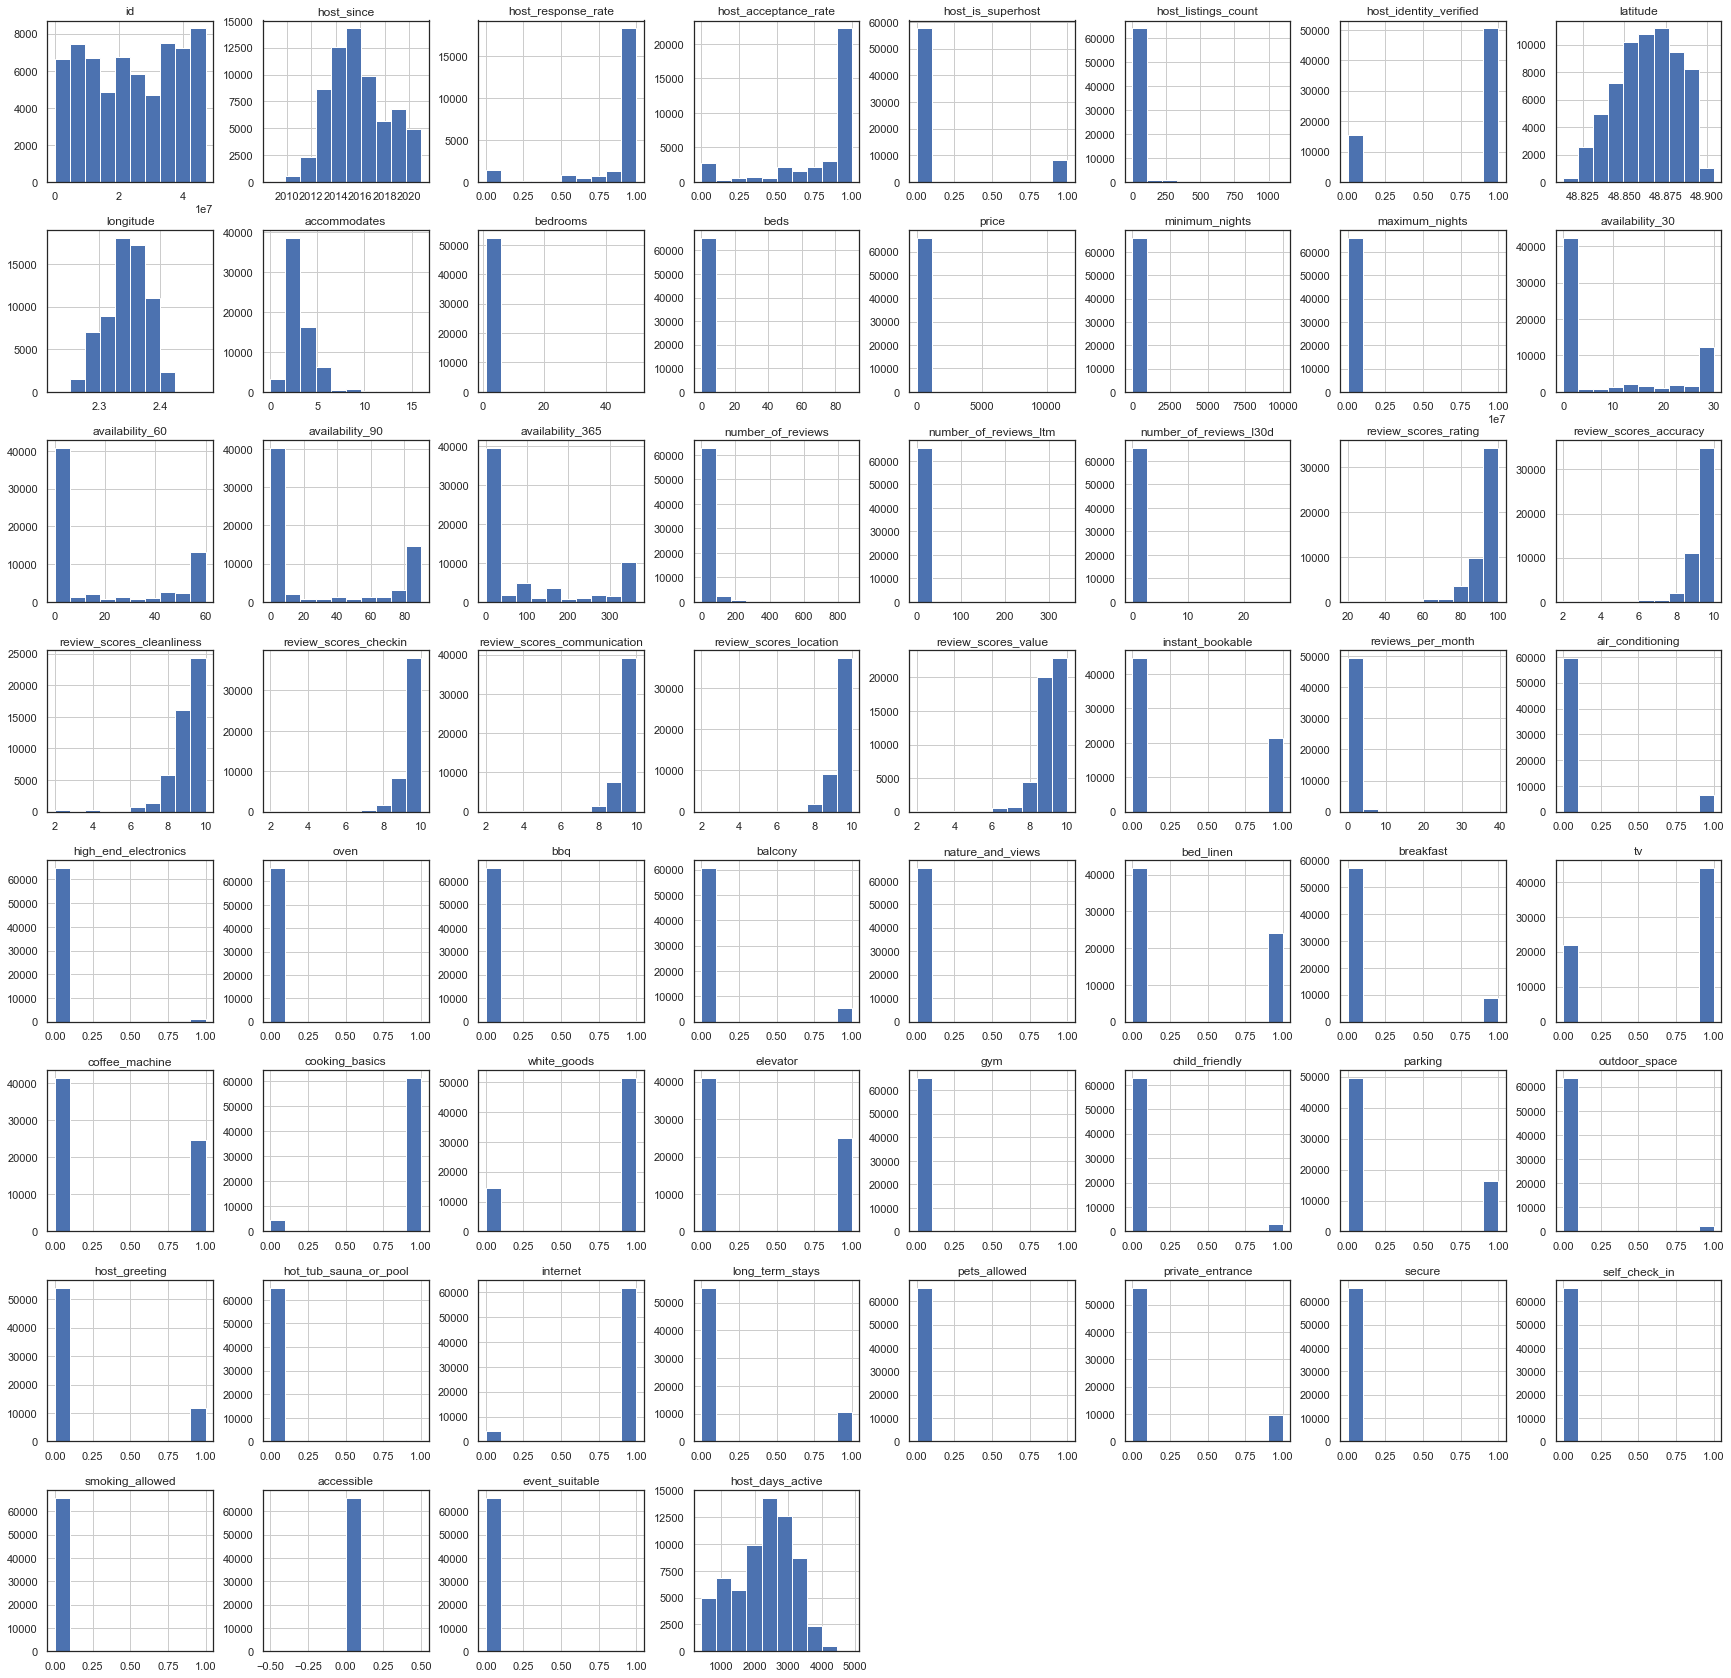

In [147]:
df.hist(figsize=(30,30));

# Analyse de données

Il y a 74 features (76 maintenant avec les 2 de bathrooms en plus). 

Il est préférable de les diviser en quelques groupes principaux pour maintenir l'intégrité de notre analyse.

Je vais commencer par la target qui est le prix.

In [148]:
sns.set_theme(font_scale=1.5, style="darkgrid")

## HeatMap

In [ ]:

df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

map_df = gpd.read_file('neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Batignolles-Monceau,None,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8..."
1,Palais-Bourbon,None,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8..."
2,Buttes-Chaumont,None,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9..."
3,Opéra,None,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8..."
4,Entrepôt,None,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8..."


In [ ]:
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values

borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

C:\Users\oulad\AppData\Local\Temp\ipykernel_13608\2154691239.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig1.colorbar(sm)


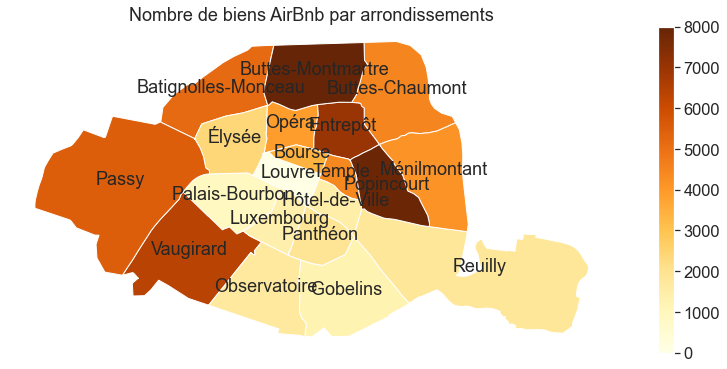

C:\Users\oulad\AppData\Local\Temp\ipykernel_13608\2154691239.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig2.colorbar(sm1)


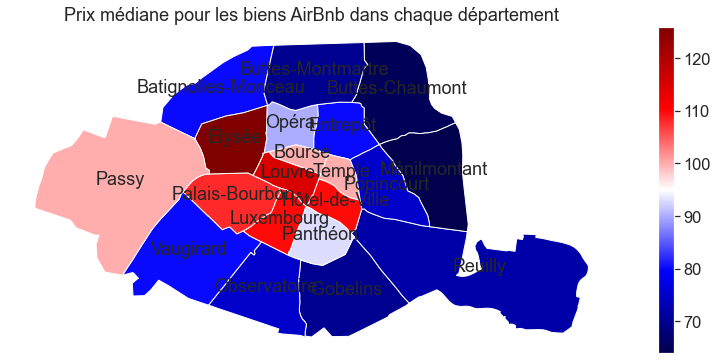

In [179]:
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='YlOrBr', ax=ax1)
ax1.axis('off')
ax1.set_title('Nombre de biens AirBnb par arrondissements')
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=0, vmax=8000))
map_df.apply(lambda x: ax1.annotate(text=x['neighbourhood'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
cbar = fig1.colorbar(sm)
plt.show()

fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='seismic', ax=ax2)
ax2.axis('off')
ax2.set_title('Prix médiane pour les biens AirBnb dans chaque département')
sm1 = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
map_df.apply(lambda x: ax2.annotate(text=x['neighbourhood'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
cbar = fig2.colorbar(sm1)
plt.show()